# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Inserm</span>

Après réception du fichier csv contenant la liste de DOI enrichie (ajout du titre, des auteurs, de l'année, du statut open access...) de la part du MESRI, les graphiques peuvent être générés directement depuis le Baromètre national (voir le mode d'emploi sur la partie "déclinaisons locales" du site web du BSO national).
Néanmoins, à partir de ce fichier, certains graphiques réalisés pour le Baromètre Inserm peuvent toujours être générés et mis à jour en suivant ce code.
Il suffit de remplacer "inserm" par le nom de son établissement à l'intérieur du code.

Les résultats obtenus ici sont le reflet de la situation d'ouverture des publications en décembre 2021, date à laquelle les dernières extractions ont été réalisées. Le Baromètre national et, par extension, ses déclinaisons locales depuis le portail national, étant mis à jour régulièrement, les taux affichés sur les graphiques ci-dessous sont obsolètes.

In [1]:
import pandas as pd

In [2]:
import csv

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [2]:
publis_inserm_df = pd.read_csv("Data/raw/bso-publications-latest_180036048_enriched.csv")

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

Proportion des publications 2020 en accès ouvert

In [3]:
pie_data = publis_inserm_df.loc[publis_inserm_df['year'] == 2020.0,:]
pie_data

,doi,year,title,journal_issns,journal_issn_l,journal_name,publisher,publisher_dissemination,hal_id,pmid,...,bso_local_affiliations,is_oa,journal_is_in_doaj,journal_is_oa,observation_date,oa_host_type,oa_colors,licence_publisher,licence_repositories,repositories
12331,10.1177/2048872616676604,2020.0,Permanent junctional reciprocating tachycardia...,"2048-8734,2048-8726",2048-8726,European Heart Journal. Acute Cardiovascular Care,Oxford University Press (OUP),Oxford University Press,NaN,27798173.0,...,180036048,True,False,False,2021Q4,publisher,hybrid,no license,NaN,NaN
22341,10.1002/acr.23335,2020.0,Age‐Related Vascularization and Ossification o...,"2151-464X,2151-4658",2151-464X,Arthritis Care & Research,Wiley,Wiley,NaN,28777893.0,...,180036048,True,False,False,2021Q4,repository,green,NaN,no license,iris.unito.it
24337,10.23736/s0390-5616.17.04082-6,2020.0,Rational use of systematic postoperative CT sc...,"0390-5616,1827-1855",0390-5616,Journal of Neurosurgical Sciences,Edizioni Minerva Medica,Edizioni Minerva Medica,NaN,28959872.0,...,130015332;180036048,False,False,False,2021Q4,closed,closed,NaN,NaN,NaN
29762,10.1016/j.rehab.2018.01.006,2020.0,Cognitive assessment in patients with multiple...,1877-0657,1877-0657,Annals of Physical and Rehabilitation Medicine,Elsevier BV,Elsevier,NaN,29462665.0,...,180036048,True,False,False,2021Q4,publisher,hybrid,no license,NaN,NaN
31571,10.1177/2048872618768004,2020.0,Which echocardiographic parameters improve the...,"2048-8734,2048-8726",2048-8726,European Heart Journal. Acute Cardiovascular Care,Oxford University Press (OUP),Oxford University Press,NaN,29629598.0,...,180036048,True,False,False,2021Q4,publisher,hybrid,no license,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83971,10.3161/15081109acc2019.21.2.001,2020.0,Systematics of West African Miniopterus with t...,1508-1109,1508-1109,Acta Chiropterologica,Museum and Institute of Zoology at the Polish ...,Museum and Institute of Zoology at the Polish ...,NaN,NaN,...,180036048,False,False,False,2021Q4,closed,closed,NaN,NaN,NaN
83972,10.3166/bspe-2020-0122,2020.0,3e Journée dédiée aux travaux scientifiques de...,0037-9085,0037-9085,Bulletin de la société de pathologie exotique,Lavoisier,Lavoisier,NaN,NaN,...,180036048,False,False,False,2021Q4,closed,closed,NaN,NaN,NaN
83978,10.3357/amhp.5435.2020,2020.0,"Vestibulo-Ocular Responses, Visual Field Depen...",2375-6314,2375-6314,Aerospace Medicine and Human Performance,Aerospace Medical Association,Aerospace Medical Association,NaN,NaN,...,180036048,False,False,False,2021Q4,closed,closed,NaN,NaN,NaN
84002,10.3791/62028,2020.0,Fluorescent Leakage Assay to Investigate Membr...,1940-087X,1940-087X,Journal of Visualized Experiments,MyJove Corporation,MyJove Corporation,hal-03367256,NaN,...,180036048,True,False,False,2021Q4,repository,green,NaN,no license,HAL


Récuperer les différentes valeurs qui nous intéressent:
- closed = l'article n'est pas en accès ouvert/dans un journal non ouvert
- gold_journal = l'article est dans un journal gold
    - gold_gold : gold + gold
    - gold_archives_ouvertes : gold + archives ouvertes
- free: libre éditeur
    - free_archives_ouvertes: free + archives ouvertes
    - free_freepubli : free + free
- archives ouvertes simple

In [4]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index().rename({False: 'Accès fermé global', True: 'Accès ouvert global'})
oa_yes_no

Accès fermé global      4486
Accès ouvert global    13738
Name: is_oa, dtype: int64

In [5]:
oa_no = (pie_data['is_oa'] == False)
oa_yes = (pie_data['is_oa'] == True)
assert(len(pie_data) == sum(oa_no)+sum(oa_yes))

In [6]:
# si dans le doaj alors gold
gold = (pie_data['journal_is_in_doaj'] == True)

In [7]:
# si oa et pas gold alors free
free = oa_yes & (pie_data['journal_is_in_doaj'] == False)

In [8]:
assert(len(pie_data) == sum(oa_no)+sum(gold)+sum(free))

In [9]:
print(f"Acces fermé: {sum(oa_no)/len(pie_data):.2%}\nGold: {sum(gold)/len(pie_data):.2%}\nFree {sum(free)/len(pie_data):.2%}")

Acces fermé: 24.62%
Gold: 32.21%
Free 43.17%


**Free** se décompose en **"Libre éditeur"** + **"Archives ouvertes"**  
* "Libre éditeur" = "publisher" + "publisher;repository"  
* "Archives ouvertes" = "repository"

In [10]:
libre_editeur =  free & ((pie_data['oa_host_type'] == 'publisher') | (pie_data['oa_host_type'] == 'publisher;repository'))

In [11]:
archive_ouverte = free & (pie_data['oa_host_type'] == 'repository')

In [12]:
assert(sum(free) == sum(libre_editeur)+sum(archive_ouverte))

In [13]:
pie_data_ext = pd.DataFrame({'oa_no' : oa_no,
                             'gold' : gold,
                             'libre_editeur' : libre_editeur,
                             'archive_ouverte' : archive_ouverte
                            })
pie_data_ext

,oa_no,gold,libre_editeur,archive_ouverte
12331,False,False,True,False
22341,False,False,False,True
24337,True,False,False,False
29762,False,False,True,False
31571,False,False,True,False
...,...,...,...,...
83971,True,False,False,False
83972,True,False,False,False
83978,True,False,False,False
84002,False,False,False,True


In [14]:
pie_data_ext_type = pie_data_ext.dot(pie_data_ext.columns).to_frame('type')
pie_data_ext_type

,type
12331,libre_editeur
22341,archive_ouverte
24337,oa_no
29762,libre_editeur
31571,libre_editeur
...,...
83971,oa_no
83972,oa_no
83978,oa_no
84002,archive_ouverte


In [15]:
pie_data_ext_chiffres = pie_data_ext_type.value_counts(normalize=True, sort=False)[['oa_no','gold','libre_editeur','archive_ouverte']].rename({'oa_no': 'Accès fermé', 'gold' : 'Gold', 'libre_editeur' : 'Libre éditeur', 'archive_ouverte' : 'Archives ouvertes'})
pie_data_ext_chiffres.mul(100).round(1).astype(str) + '%'

type             
Accès fermé          24.6%
Gold                 32.2%
Libre éditeur        29.8%
Archives ouvertes    13.4%
dtype: object

In [16]:
gold_publi = gold & (pie_data['oa_host_type'] == 'publisher')

In [17]:
gold_rep = gold & (pie_data['oa_host_type'] == 'publisher;repository')

In [18]:
gold_rep_only = gold & (pie_data['oa_host_type'] == 'repository')

In [19]:
assert(sum(gold) == sum(gold_publi)+sum(gold_rep)+sum(gold_rep_only))

In [20]:
print(f"Répartition Gold: \ngold_publi: {sum(gold_publi)/sum(gold):.2%}\ngold_rep: {sum(gold_rep)/sum(gold):.2%}\ngold_rep_only: {sum(gold_rep_only)/sum(gold):.2%}")

Répartition Gold: 
gold_publi: 1.23%
gold_rep: 98.42%
gold_rep_only: 0.36%


In [21]:
free_publi = free & (pie_data['oa_host_type'] == 'publisher')

In [22]:
free_rep = free & (pie_data['oa_host_type'] =='publisher;repository')

In [23]:
free_rep_only = free & (pie_data['oa_host_type'] =='repository')

In [24]:
assert(sum(free) == sum(free_publi)+sum(free_rep)+sum(free_rep_only))

In [25]:
print(f"Répartition Free: \nfree_publi: {sum(free_publi)/sum(free):.2%}\nfree_rep: {sum(free_rep)/sum(free):.2%}\nfree_rep_only: {sum(free_rep_only)/sum(free):.2%}")

Répartition Free: 
free_publi: 25.00%
free_rep: 44.01%
free_rep_only: 30.99%


In [26]:
pie_data_int = pd.DataFrame({'oa_no' : oa_no,
                   'gold_publi' : gold_publi ,
                   'gold_rep' : gold_rep,
                   'gold_rep_only' : gold_rep_only,
                   'free_publi' : free_publi,
                   'free_rep' : free_rep,
                   'archive_ouverte' : archive_ouverte
                            })
pie_data_int

,oa_no,gold_publi,gold_rep,gold_rep_only,free_publi,free_rep,archive_ouverte
12331,False,False,False,False,True,False,False
22341,False,False,False,False,False,False,True
24337,True,False,False,False,False,False,False
29762,False,False,False,False,True,False,False
31571,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
83971,True,False,False,False,False,False,False
83972,True,False,False,False,False,False,False
83978,True,False,False,False,False,False,False
84002,False,False,False,False,False,False,True


In [28]:
pie_data_int_type = pie_data_int.dot(pie_data_int.columns).to_frame('type')
pie_data_int_type

,type
12331,free_publi
22341,archive_ouverte
24337,oa_no
29762,free_publi
31571,free_publi
...,...
83971,oa_no
83972,oa_no
83978,oa_no
84002,archive_ouverte


In [29]:
pie_data_int_chiffres = pie_data_int_type.value_counts(normalize=True, sort=False)[['oa_no','gold_publi','gold_rep','gold_rep_only','free_publi','free_rep','archive_ouverte']].rename({'oa_no': 'Accès fermé', 'gold_publi' : 'Gold éditeur', 'gold_rep' : 'Gold en Archives ouvertes', 'free_publi' : 'Libre éditeur', 'free_rep' : 'Libre éditeur en Archives ouvertes', 'archive_ouverte' : 'Archives ouvertes'})
pie_data_int_chiffres.mul(100).round(1).astype(str) + '%'

type                              
Accès fermé                           24.6%
Gold éditeur                           0.4%
Gold en Archives ouvertes             31.7%
gold_rep_only                          0.1%
Libre éditeur                         10.8%
Libre éditeur en Archives ouvertes    19.0%
Archives ouvertes                     13.4%
dtype: object

C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_15992\3352899117.py:31: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000001B605109910> starts with '_'. It is thus excluded from the legend.
  legende_int  = fig.legend(slices_int,
C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_15992\3352899117.py:31: UserWarning: The label '_nolegend_' of <matplotlib.patches.Wedge object at 0x000001B60516B970> starts with '_'. It is thus excluded from the legend.
  legende_int  = fig.legend(slices_int,


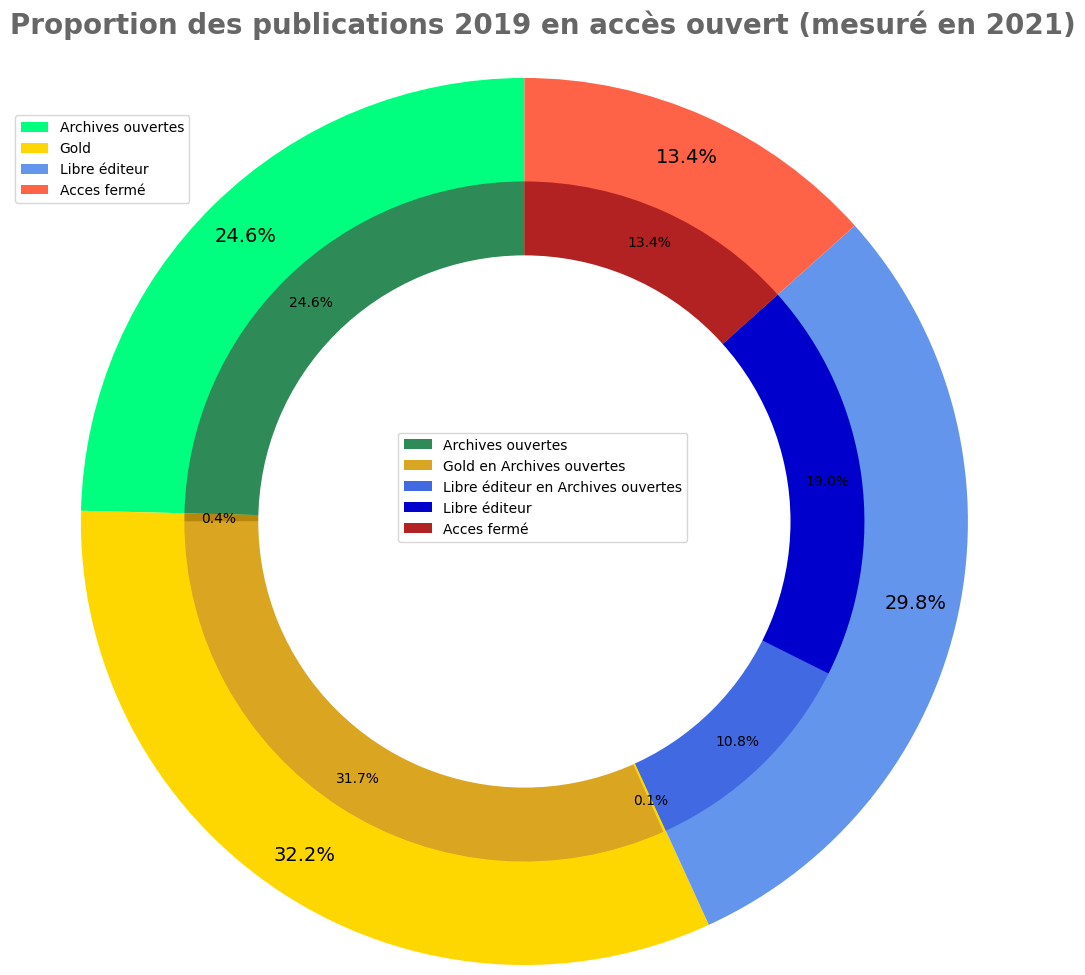

In [30]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
# Cercle extérieur
slices_ext, legend_labels_ext, pct_labels_ext = ax.pie(pie_data_ext_chiffres,  
       radius=3, 
       labeldistance = None,
       textprops = {'fontsize':14, 'color':'black'},
       colors=['springgreen', 'gold', 'cornflowerblue', 'tomato', ],  
       autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9, 
       startangle=90,
       frame = True
      );
# Cercle intérieur
slices_int, legend_labels_int, pct_labels_int = ax.pie(pie_data_int_chiffres,
       radius=2.3, 
       labeldistance = None, 
       colors=['seagreen','darkgoldenrod','goldenrod','gold','royalblue','mediumblue','firebrick'], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9, 
       startangle=90);
# Cercle blanc intérieur
ax.pie([1], radius=1.8, colors='white');
# Legende extérieur
legende_ext = plt.legend(slices_ext, 
                           ['Archives ouvertes', 'Gold','Libre éditeur','Acces fermé'],  
                           bbox_to_anchor=(0,1.25), 
                           loc="center right", 
                           bbox_transform=plt.gcf().transFigure
                          )
# Legende intérieur (la légende est ajoutée à la figure et non au plot, sinon la légende précedente est écrasée)
legende_int  = fig.legend(slices_int, 
                           ['Archives ouvertes', '_nolegend_', 'Gold en Archives ouvertes', '_nolegend_', 'Libre éditeur en Archives ouvertes', 'Libre éditeur', 'Acces fermé'],  
                            loc = "center"
                          )
#ax.legend(loc="center", fontsize = 12)
plt.title('Proportion des publications 2019 en accès ouvert (mesuré en 2021)', fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_proportion_publications_oa_20211214.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Taux d'accès ouvert par disciplines 2020

In [31]:
publications_2020 = publis_inserm_df.loc[publis_inserm_df['year'] == 2020.0,:]

In [32]:
publications_par_domaine_type = publications_2020['bso_classification'].value_counts().sort_index()
publications_par_domaine_type

Biology (fond.)                                  3342
Chemistry                                         361
Computer and \n information sciences               72
Earth, Ecology, \nEnergy and applied biology      148
Engineering                                        23
Humanities                                         35
Mathematics                                        19
Medical research                                13827
Physical sciences, Astronomy                      225
Social sciences                                   172
Name: bso_classification, dtype: int64

In [33]:
conditionlist = [
    (publications_2020['is_oa'] == False) ,
    (publications_2020['journal_is_in_doaj'] == True),
    ((publications_2020['is_oa'] == True) & (publications_2020['journal_is_in_doaj'] == False) & ((publications_2020['oa_host_type'] == 'publisher') | (publications_2020['oa_host_type'] == 'publisher;repository'))),
    (publications_2020['oa_host_type'] == 'repository') 
    ]
choicelist = ['closed', 'gold', 'free', 'rep']
publications_2020['depot'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_15992\278930648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publications_2020['depot'] = np.select(conditionlist, choicelist, default='Not Specified')


In [34]:
df_oa_discipline_global_type = pd.crosstab([publications_2020['bso_classification']],publications_2020['depot'])
# Ajout d'une colonne avec le total par discipline
df_oa_discipline_global_type["Total"] = publications_par_domaine_type
# Traduction des disciplines en français
df_oa_discipline_global_type.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_global_type = df_oa_discipline_global_type.sort_values(by='closed', ascending=True)
# Ajout d'une colonne qui concatène le nom de la discipline et le total
df_oa_discipline_global_type["y_label"] = df_oa_discipline_global_type.index + "\n" + df_oa_discipline_global_type["Total"].apply(str) \
                                     + " " + "publications"
# Réindexation de l'index pour que les bonnes informations s'affichent dans le graphique final
df_oa_discipline_global_type.index = df_oa_discipline_global_type["y_label"]
df_oa_discipline_global_type

depot,closed,free,gold,rep,Total,y_label
y_label,,,,,,
Sciences de l'Ingénieur\n23 publications,1,10,1,11,23,Sciences de l'Ingénieur\n23 publications
Informatique\n72 publications,4,9,18,41,72,Informatique\n72 publications
Humanités\n35 publications,8,12,10,5,35,Humanités\n35 publications
Mathématiques\n19 publications,8,4,1,6,19,Mathématiques\n19 publications
"Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée\n148 publications",16,43,50,39,148,"Sciences de la Terre, Ecologie, \nEnergie et b..."
"Sciences physiques, astronomie\n225 publications",20,40,50,115,225,"Sciences physiques, astronomie\n225 publications"
Chimie\n361 publications,52,85,72,152,361,Chimie\n361 publications
Sciences sociales\n172 publications,65,42,42,23,172,Sciences sociales\n172 publications
Biologie (fond.)\n3342 publications,377,870,1620,475,3342,Biologie (fond.)\n3342 publications


In [35]:
df_oa_discipline_type = pd.crosstab([publications_2020['bso_classification']],publications_2020['depot'])
df_oa_discipline_type = (df_oa_discipline_type.T / df_oa_discipline_type.T.sum()).mul(100).round(1)
df_oa_discipline_type = df_oa_discipline_type.T
df_oa_discipline_type["Total"] = publications_par_domaine_type
df_oa_discipline_type.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_type["y_label"] = df_oa_discipline_type.index + "\n" + df_oa_discipline_type["Total"].apply(str) \
                                     + " " + "publications"
df_oa_discipline_type.index = df_oa_discipline_type["y_label"]
df_oa_discipline_type = df_oa_discipline_type.sort_values(by='closed', ascending=True)
df_oa_discipline_type

depot,closed,free,gold,rep,Total,y_label
y_label,,,,,,
Sciences de l'Ingénieur\n23 publications,4.3,43.5,4.3,47.8,23,Sciences de l'Ingénieur\n23 publications
Informatique\n72 publications,5.6,12.5,25.0,56.9,72,Informatique\n72 publications
"Sciences physiques, astronomie\n225 publications",8.9,17.8,22.2,51.1,225,"Sciences physiques, astronomie\n225 publications"
"Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée\n148 publications",10.8,29.1,33.8,26.4,148,"Sciences de la Terre, Ecologie, \nEnergie et b..."
Biologie (fond.)\n3342 publications,11.3,26.0,48.5,14.2,3342,Biologie (fond.)\n3342 publications
Chimie\n361 publications,14.4,23.5,19.9,42.1,361,Chimie\n361 publications
Humanités\n35 publications,22.9,34.3,28.6,14.3,35,Humanités\n35 publications
Sciences médicales\n13827 publications,28.5,31.2,29.0,11.4,13827,Sciences médicales\n13827 publications
Sciences sociales\n172 publications,37.8,24.4,24.4,13.4,172,Sciences sociales\n172 publications


Text(0.49, 1.02, "Taux d'accès ouvert aux publications 2020 par discipline")

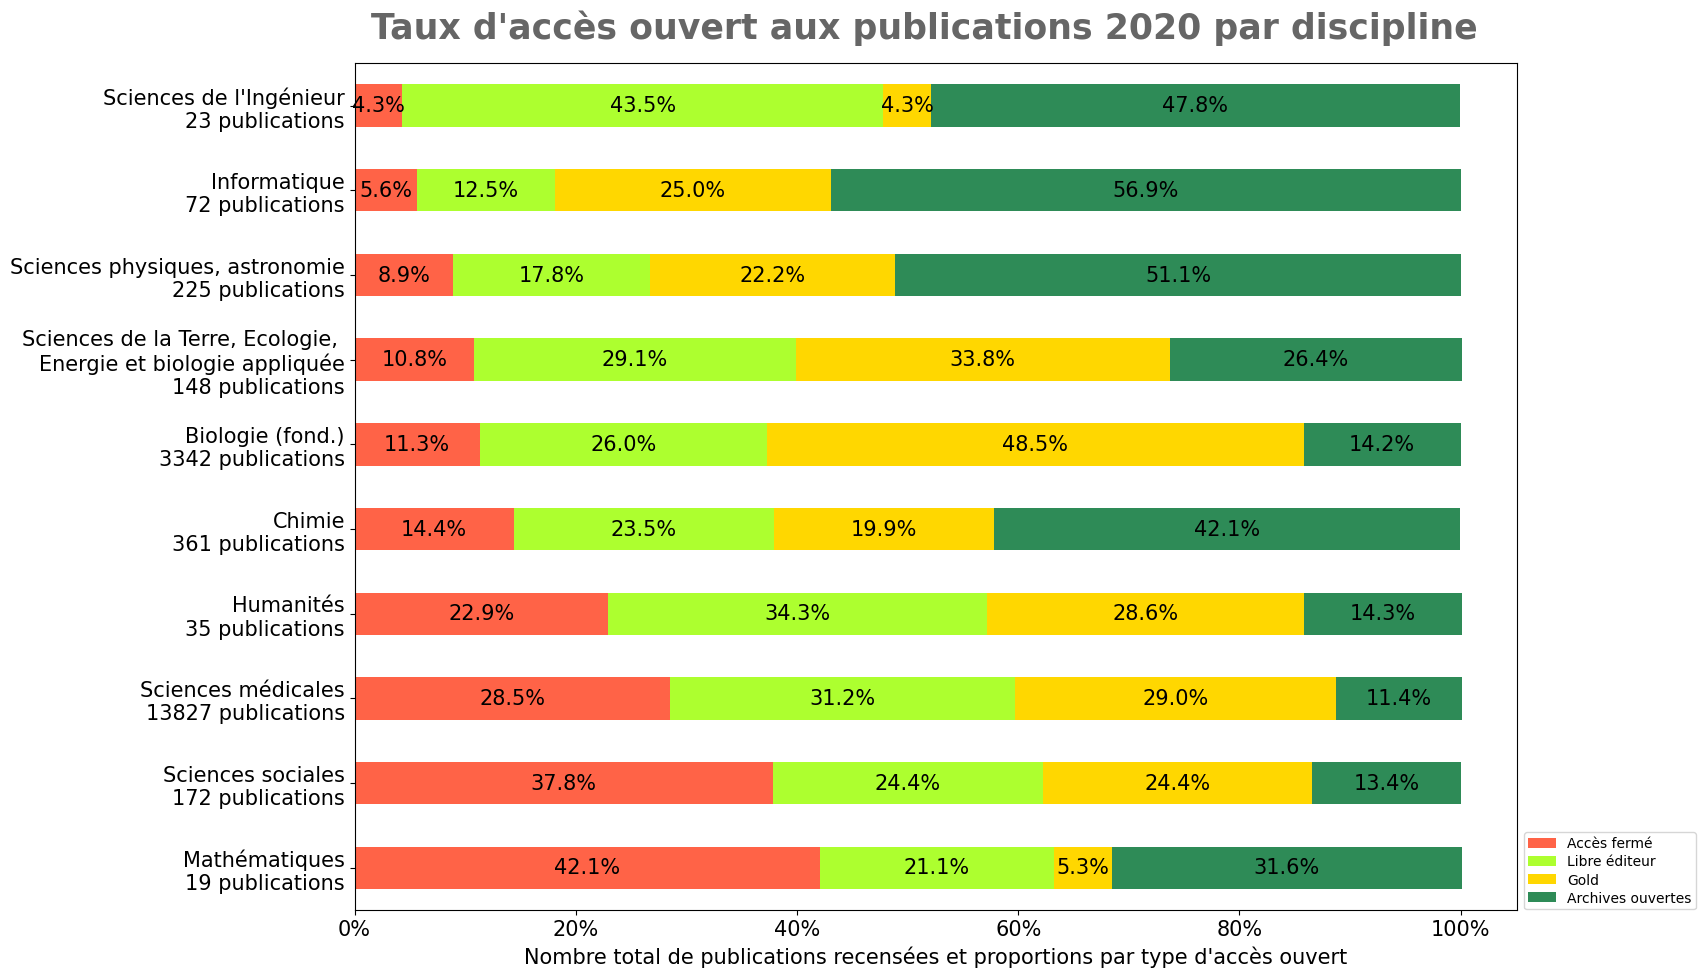

In [36]:
import matplotlib.ticker as mtick

ax = df_oa_discipline_type.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','greenyellow','gold','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline_type.columns:
    for i in df_oa_discipline_type.index:
        label = str(df_oa_discipline_type.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# Trier les disciplines par ordre alphabétique
plt.gca().invert_yaxis()
plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 13)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.
plt.legend(['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2020 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
#plt.savefig('Data/outputs/2020_taux_type_oa_discipline_type_20220217.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Evolution des frais de publications (APC)

Les données ont majoritairement été extraites de la plateformes OpenAPC mais une partie des sources sont internes à l'Institut. Pour autant, l'Inserm met à disposition cette portion de code, à toutes fins utiles.

In [37]:
open_APC_df = pd.read_csv("Data/raw/open_apc_inserm_15-19.csv")

In [38]:
all_graph_data_df = open_APC_df.sort_values(['period','is_hybrid','euro'],ascending=False)
graph_data_df = all_graph_data_df[['period','is_hybrid','euro']]

In [39]:
graph_data_df

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [41]:
graph_data_gold = graph_data_df.loc[graph_data_df['is_hybrid'] == False,:]

In [42]:
graph_data_gold

,period,is_hybrid,euro
1635,2019,False,5148.00
1622,2019,False,4500.00
1657,2019,False,4480.00
1948,2019,False,4480.00
2015,2019,False,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [43]:
graph_data_gold_2019 = graph_data_gold.loc[graph_data_gold['period'] == 2019.0,:]
somme_gold_2019 = graph_data_gold_2019['euro'].sum()

In [44]:
somme_gold_2019

1105484.3

In [45]:
graph_data_gold_2018 = graph_data_gold.loc[graph_data_gold['period'] == 2018.0,:]
somme_gold_2018 = graph_data_gold_2018['euro'].sum()

In [46]:
somme_gold_2018

781361.5700000001

In [47]:
graph_data_gold_2017 = graph_data_gold.loc[graph_data_gold['period'] == 2017.0,:]
somme_gold_2017 = graph_data_gold_2017['euro'].sum()

In [48]:
somme_gold_2017

1042570.37

In [49]:
graph_data_gold_2015 = graph_data_gold.loc[graph_data_gold['period'] == 2015.0,:]
somme_gold_2015 = graph_data_gold_2015['euro'].sum()

In [50]:
somme_gold_2015

645550.9400000001

In [51]:
graph_data_hybrid = graph_data_df.loc[graph_data_df['is_hybrid'] == True,:]

In [52]:
graph_data_hybrid

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
446,2015,True,741.00
447,2015,True,734.00
458,2015,True,536.90
461,2015,True,450.00


In [53]:
graph_data_hybrid_2019 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2019.0,:]
somme_hybrid_2019 = graph_data_hybrid_2019['euro'].sum()

In [54]:
somme_hybrid_2019

158720.41999999998

In [55]:
graph_data_hybrid_2018 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2018.0,:]
somme_hybrid_2018 = graph_data_hybrid_2018['euro'].sum()

In [56]:
somme_hybrid_2018

141293.34

In [57]:
graph_data_hybrid_2017 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2017.0,:]
somme_hybrid_2017 = graph_data_hybrid_2017['euro'].sum()

In [58]:
somme_hybrid_2017

166908.78

In [59]:
graph_data_hybrid_2015 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2015.0,:]
somme_hybrid_2015 = graph_data_hybrid_2015['euro'].sum()

In [60]:
somme_hybrid_2015

172639.52000000002

C:\Users\juliette.janes\AppData\Local\Temp\ipykernel_15992\4222670905.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])


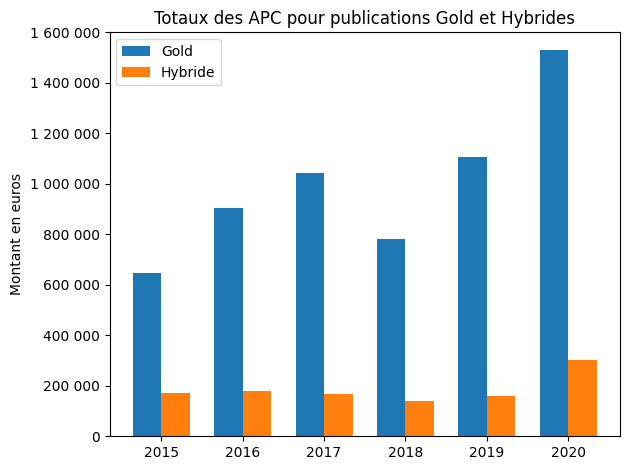

In [61]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['2015', '2016', '2017', '2018', '2019', '2020']
gold = [somme_gold_2015, 902802, somme_gold_2017, somme_gold_2018, somme_gold_2019, 1529664]
hybrid = [somme_hybrid_2015, 179945, somme_hybrid_2017, somme_hybrid_2018, somme_hybrid_2019, 303541]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gold, width, label='Gold')
rects2 = ax.bar(x + width/2, hybrid, width, label='Hybride')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Montant en euros')
ax.set_title('Totaux des APC pour publications Gold et Hybrides')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1600000)
ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

#plt.show()

#plt.savefig('./Totaux_APC_Gold_Hybride_20211110.png', dpi=100, bbox_inches='tight', pad_inches=0.9)